# **Análise de Crédito - Classificação**

<br>
Este é meu primeiro projeto que estou criando acompanhando o Curso **Machine Learning e Data Science com Python** (Jones Granatyr: disponível em [Udemy](https://https://www.udemy.com/course/machine-learning-e-data-science-com-python-y/)).

A intenção deste primeiro projeto é compartilhar minha evolução em análise de dados partindo do zero e praticar documentação da análise com storytelling. 
Este primeiro projeto trata-se de estudo de predição por Classificação para determinar se uma pessoa ganha mais de 50 mil por ano. A  [base de dados](https://archive.ics.uci.edu/ml/datasets/Adult)  foi baixada do repositório de Machine Learning da [UCI](https://archive.ics.uci.edu/ml/index.php)  (University of California, Irvine).

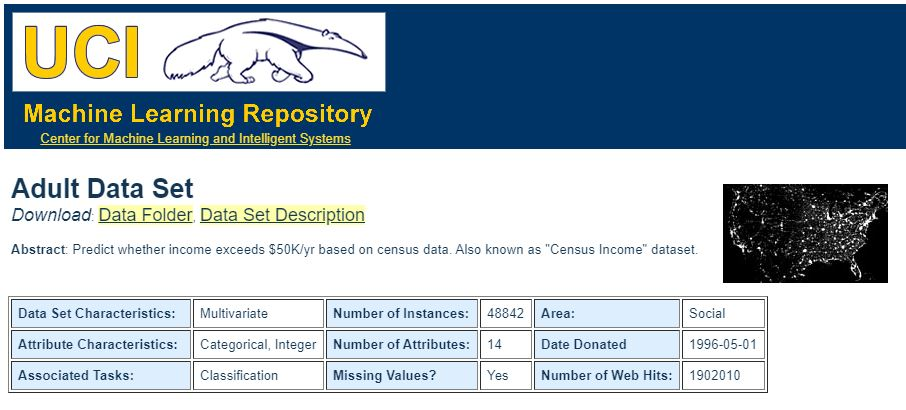

 <br><br>
 <p align=center><img src="https://bit.ly/31kiimn" width="60%"></p>

<br><br>



### **Pré Processamento**

In [ ]:
#Importandos os pacotes necessários

import pandas as pd
import numpy as np

from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
base = pd.DataFrame(pd.read_csv('census.csv'))
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
base.dtypes

age                int64
workclass         object
final-weight       int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loos       int64
hour-per-week      int64
native-country    object
income            object
dtype: object

In [ ]:
previsores = base.iloc[:, 0:14].values
classe = base.iloc[:, 14].values
print("Previsores:\n",previsores, "\n\n","Classe:\n",classe)


Previsores:
 [[39 ' State-gov' 77516 ... 0 40 ' United-States']
 [50 ' Self-emp-not-inc' 83311 ... 0 13 ' United-States']
 [38 ' Private' 215646 ... 0 40 ' United-States']
 ...
 [58 ' Private' 151910 ... 0 40 ' United-States']
 [22 ' Private' 201490 ... 0 20 ' United-States']
 [52 ' Self-emp-inc' 287927 ... 0 40 ' United-States']] 

 Classe:
 [' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']


In [ ]:
# transformar variável Nominal em Discreta

labelencoder_previsores = LabelEncoder()
#labels = labelencoder_previsores.fit_transform(previsores[:, 1])

In [ ]:

onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
previsores = onehotencorder.fit_transform(previsores).toarray()
previsores.shape

(32561, 108)

In [ ]:
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)
classe

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
escaler = StandardScaler()
previsores = escaler.fit_transform(previsores)

In [ ]:
#Separando a base de dados entre Treinamento e Teste

previsores_treinamento, previsores_teste, classe_treinamento,classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)
print(previsores_treinamento.shape,previsores_teste.shape, classe_treinamento.shape, classe_teste.shape)

(27676, 108) (4885, 108) (27676,) (4885,)


### **Aprendizagem**
**Em andamento*
<br><br>
### **Regressão**
**Em andamento*
<br><br>
### **Máquina de Vetores de Suporte (SVM)**
**Em andamento*
<br><br>
### **Redes Neurais Artificiais**
**Em andamento*
<br>